<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation 
***

**Name**: James Gallmeister

***

This assignment is due on Canvas by **5 PM on Friday February 15**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1

Courtney, Nick and Jarrod are playing special version of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>. Because the three of them are all scoundrels, they are all currently in Jail. In Monopoly, players roll two 6-sided dice on their turn. In their version of Monopoly, however, to get out of Jail, a player must roll *doubles* (the two dice have the same outcome) and must keep re-rolling the dice until they get doubles during their first turn in Jail. As soon as a player rolls doubles, they are let out of Jail and their turn ends. Let $D$ represent the event that a player rolls doubles.

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). It is okay to use Python as a calculator, of course.

**Part A**: What is the probability that a player will roll doubles on their first, second, or third roll while in jail? Note that if a player rolls doubles on their third roll, for example, then they must *not* have rolled doubles on either of the first two rolls. Keep 4 decimal places in your answer.

**ANSWER A**
<br>First we need to compute each roll separately. We can do this because each roll of two dice is a disjoint event.
If we roll doubles on the first roll, there are 6 different ways that we can do that. If we roll doubles on the second roll, we must not have rolled doubles on the first roll. If we roll doubles on the third roll, we must assume the first two rolls were not doubles so we get the following:
    <br><br>Roll 1: $$\text{P(doubles on first roll) = }\frac{6}{36} = \frac{1}{6}$$
    <br>Roll 2: $$\text{P(!doubles on first roll, doubles on second) = }\Big(\frac{5}{6}\Big)\Big(\frac{1}{6}\Big) = \frac{5}{36}$$
    <br>Roll 3: $$\text{P(!doubles on first && !doubles on second && doubles on third) = }\Big(\frac{5}{6}\Big)\Big(\frac{5}{6}\Big)\Big(\frac{1}{6}\Big) = \frac{25}{216}$$
    
<br>Now we can add those three probabilities together to get the total probability of rolling doubles within three rolls:<br><br>
$$\text{P(doubles within three rolls) = }\frac{1}{6} + \frac{5}{36} + \frac{25}{216} = \frac{91}{216} \approx 42.1296\%$$

**Part B:** *The plot thickens!* Darth Ketelsen is well-known to meddle in Jedi affairs. Did I mention that Courtney, Nick and Jarrod are all in Computer Science Jedi training? That's not important for this problem, but it is interesting. 

Turns out, Darth Ketelsen will occasionally secretly swap out the dice in the Jedi's Monopoly game for a pair of dice that have been weighted. Each of Darth Ketelsen's two dice is weighted such that a 6 is rolled with probability $1/2$, and all the other numbers are equally likely to be rolled. If Darth Ketelsen switches the dice for her weighted ones, she does so before the game begins, and the entire game of Monopoly is played with the same pair of dice, whether they are fair or weighted.

What is the probability of rolling doubles on the first, second or third roll while in jail, using Darth Ketelsen's weighted dice? Again, keep 4 decimal places in your answer.

**Answer B**
<br>The same as above, to get the probability of rolling doubles within three rolls, we can either:
   1. Roll doubles on our first roll.
   2. Not roll doubles on our first roll and roll doubles on our second roll.
   3. Not roll doubles on our first two rolls and roll doubles on our third roll.

Now because we are using a weighted dice which makes rolling a 6 $\Big(\frac{1}{2}\Big)$ we can adjust our dice probabilities to make each roll out of 10. So the probability of rolling a 1,2,3,4 or 5 are all $\Big(\frac{1}{10}\Big)$ while the probability of rolling a 6 is $\Big(\frac{5}{10}\Big)$.

Using the above information we get the following:
<br>Roll 1: $$\text{P(doubles on first roll) =} \frac{30}{100} = \frac{300}{1000}$$
<br>Roll 2: $$\text{P(!doubles on first && doubles on second) =} \Big(\frac{70}{100}\Big) \Big(\frac{30}{100}\Big) = \frac{210}{1000}$$
<br>Roll 3: $$\text{P(!doubles on first && !doubles on second && doubles on third) =}\Big(\frac{7}{10}\Big)\Big(\frac{7}{10}\Big)\Big(\frac{3}{10}\Big) = \frac{147}{1000}$$
<br><br>Now adding up the three probabilities of the rolls above we get: $$\text{P(doubles on first three rolls with weighted dice) =} \frac{300}{1000} + \frac{210}{1000} + \frac{147}{1000} = \frac{657}{1000} \approx 65.7000\%$$

**Part C:** Suppose that before any given game of Monopoly, Darth Ketelsen replaces the normal six-sided dice with her loaded dice with probability $0.25$. Then the players proceed to play their entire game using either the loaded dice, or the fair dice.  It is unknown to the player who is rolling, however, whether they are using the unfair or fair dice. What is the probability that a player gets doubles within three rolls? Keep 4 decimal places in your answer.

**Answer C**
<br>From the question above we know that there is a $25\%$ chance that a player rolls Darth's loaded dice and a $75\%$ chance of rolling the unloaded dice. So by using the numbers from parts A and B we know that the probability of rolling doubles on your first roll must be the sum of the probabilities from parts A and B and so forth for the second and third rolls.
<br>Therefore we have: 
<br>Roll 1: $$\text{P(doubles on first roll with loaded dice || doubles on first roll with unloaded dice) =} \Bigg(\Big(\frac{1}{4}\Big)\Big(\frac{3}{10}\Big)\Bigg) + \Bigg(\Big(\frac{3}{4}\Big)\Big(\frac{1}{6}\Big)\Bigg) = \frac{3}{40} + \frac{3}{24} = \frac{1}{5}$$
<br>Roll 2: $$\text{P(doubles on second roll w/ loaded dice || doubles on second roll w/ unloaded dice) =} \Bigg(\Big(\frac{1}{4}\Big)\Big(\frac{21}{100}\Big)\Bigg) + \Bigg(\Big(\frac{3}{4}\Big)\Big(\frac{5}{36}\Big)\Bigg) = \frac{21}{400} + \frac{15}{144} = \frac{47}{300}$$
<br>Roll 3: $$\text{P(doubles on third roll w/ loaded dice || doubles on third roll w/ unloaded dice) =} \Bigg(\Big(\frac{1}{4}\Big)\Big(\frac{147}{1000}\Big)\Bigg) + \Bigg(\Big(\frac{3}{4}\Big)\Big(\frac{25}{216}\Big)\Bigg) = \frac{147}{4000} + \frac{75}{864} = \frac{139}{1125}$$
<br><br>Now adding up the fractions above, we get the following:
$$\text{P(doubles within three rolls with loaded or unloaded dice) =} \frac{1}{5} + \frac{47}{300} + \frac{139}{1125} = \frac{2161}{4500} \approx 48.0222\%$$

**Part D:** While it is unknown whether they are playing with Darth Ketelsen's unfair dice, or with fair dice, Courtney, Jarrod and Nick are armed and dangerous... with *probability theory*, that is! Well, probability theory and lightsabers.

Suppose that starting from jail, all three of Courtney, Jarrod and Nick have taken one turn, and all three of them have managed to roll doubles within 3 rolls. If you were not given this information, you would assume that there is a probability of $0.25$ that they are playing with Darth Ketelsen's unfair dice. But now, given this information, what is the probability that they are playing with the unfair dice?

**Answer D**
<br>We can use Bayes Theorem and the information calculated above to help us solve this problem. What we are looking for is:
$$\text{P(Players used loaded dice}\equiv A \text{, given that the players rolled doubles within 3 rolls} \equiv C)$$
<br> By Bayes Theorem we can define our:
$$\text{Prior Distribution: } 0.25 \\
  \text{Probability of } C \text{ given } A: \frac{657}{1000} \\
  \text{Probability of } C \text{ given } A^c: \frac{91}{216} \\
  \text{Now by Bayes rule we get the following: } \\
  P(A|C) = \frac{P(C|A)P(A)}{P(C|A)P(A) + P(C|A^c)P(A^c)} \\
  \text{Now we plug in our numbers from above and get:} \\
  P(A|C) = \frac{\frac{657}{1000} * \frac{1}{4}}{\Big(\frac{657}{1000} * \frac{1}{4}\Big) + \Big(\frac{91}{216} * \frac{3}{4}\big)} \\
  P(A|C) = 0.675251 \approx 67.5251\%$$
  
By the work above and the application of Bayes Theorem, I calculate that given the information above, there is a 67.5251% chance that our three players were using the loaded dice.

**Part E**:  First, work out **by hand** a formula for the probability in general that Courtney, Jarrod and Nick are playing with Darth Ketelsen's unfair dice, given that $n$ players in a row have gotten out of jail by rolling doubles within 3 rounds. That is, you want to find a formula for $P(U \mid D_n)$ in terms of $n$.

Then, define a function `prob_unfair` to calculate $P(U \mid D_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** by plugging in $n=3$.

**Answer E**
<br>By using Bayes Rule, we can obtain the following formula:
$$
P(U \mid D_n) = \frac{P(D_n \mid U)P(U)}{P(D_n \mid U)P(U) + P(D_n|U^c)P(U^c)} \\
\text{Now, we know that the probability that n players roll doubles in three turns is } P(D_n|U^c) = \Big(\frac{91}{216}\Big)^n \\
\text{We also know that the probability that n players roll doubles with weighted dice is }P(D_n|U) = \Big(\frac{657}{1000}\Big)^n \\
\text{The probability of using the fair(U^c) dice and unfair(U) dice is as follows, respectively } P(U^c) = \frac{3}{4} \text{ and } P(U) = \frac{1}{4} \\
\text{With the information we can produce a formula for the } P(U \mid D_n) \text{ as follows: } \\
P(U \mid D_n) = \frac{P(D_n \mid U)P(U)}{P(D_n \mid U)P(U) + P(D_n \mid U^c)P(U^c)} \\
P(U \mid D_n) = \frac{\Big(\frac{657}{1000}\Big)^n\Big(\frac{1}{4}\Big)}{\Big(\frac{657}{1000}\Big)^n\Big(\frac{1}{4}\Big) + \Big(\frac{91}{216}\Big)^n\Big(\frac{3}{4}\Big)}
$$

In [38]:
def prob_unfair(n):
    x = ((657 / 1000) ** n) * (1/4)
    x = x/(((657 / 1000) ** n) * (1/4)+((91 / 216)**n) * (3 / 4))
    #print("The probability that {} players rolled with unfair dice is: {:.4f}%".format(n, x * 100))
    return x

print("The probability that {} players rolled with unfair dice is: {:.4f}%".format(3,prob_unfair(3)))

The probability that 3 players rolled with unfair dice is: 0.5583%


**Part F:**  What is the smallest value of $n$ players in a row rolling doubles within 3 rounds that would lead to a higher-than-90% probability that the dice are unfair?  Plugging larger and larger values for $n$ into your `prob_unfair` function is a very reasonable way to check this.

**Answer F**
<br>With the function that I defined above, if it is correct or near correct then by the code below can verify that 8 players rolling doubles within 3 rounds in a row will correspond to a probability higher than 90% that the dice are unfair.

In [9]:
def run_sim():
    for x in range(1,10):
        prob_unfair(x)
run_sim()

The probability that 1 players rolled with unfair dice is: 34.2029%
The probability that 2 players rolled with unfair dice is: 44.7713%
The probability that 3 players rolled with unfair dice is: 55.8341%
The probability that 4 players rolled with unfair dice is: 66.3466%
The probability that 5 players rolled with unfair dice is: 75.4568%
The probability that 6 players rolled with unfair dice is: 82.7423%
The probability that 7 players rolled with unfair dice is: 88.2033%
The probability that 8 players rolled with unfair dice is: 92.1011%
The probability that 9 players rolled with unfair dice is: 94.7872%


**Part G:** Jarrod, Courtney and Nick are becoming suspicious that the dice they are playing with are unfair. They decide to keep track of how frequently each player rolls doubles. They will roll the dice `n_trials` number of times, and make a plot of their running estimate of the probability of rolling doubles, from the moment they start rolling until they finally finish all `n_trials` rolls. So, the x-axis of their plot will be the number of rolls, and the y-axis will be the running estimate of the probability of rolling doubles with the given dice, with the number of trials given by the x-axis.

Write code to run 4 independent simulations of 1,000 trials each to estimate the probability of rolling doubles using the fair dice, and another 4 independent simulations to estimate the probability of rolling doubles using Darth Ketelsen's loaded dice, and plot their running estimate curves on the same set of axes. 

In order to more easily distinguish between the loaded dice estimates and the fair dice estimates, plot the loaded dice estimates as lines using the color `tomato` and plot the fair dice estimates using the color `seagreen`. Be sure to label your axes and include a legend.

Finally, comment on how many flips appear to be necessary before Jarrod, Courtney and Nick might become convinced of what type of dice they are playing with (fair or unfair). Justify your answer fully using your figure.

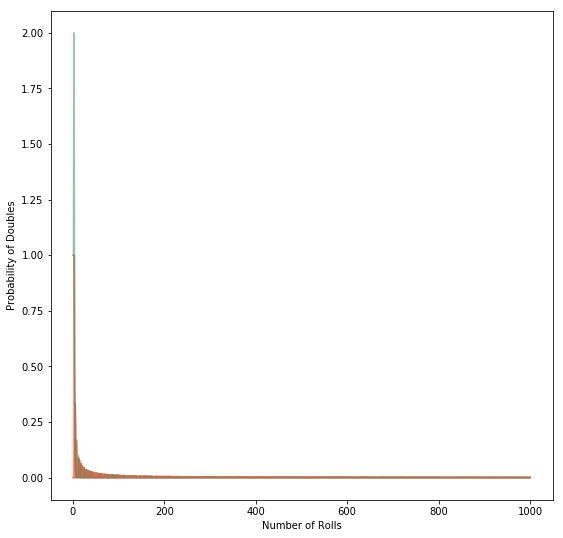

In [39]:
def roll_fair():
    return np.random.randint(1,7) == np.random.randint(1,7)

def roll_unfair():
    die = np.array([1,2,3,4,5,6,6,6,6,6])
    return np.random.choice(die) == np.random.choice(die)

def graph_sim():
    fair = []
    unfair = []
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    for _ in range(4):
        fair = []
        unfair = []
        for ii in range(1000):
            if ii != 0:
                fair.append((fair[ii-1] + roll_fair()) / ii)
                unfair.append((unfair[ii-1] + roll_unfair()) / ii)
            else:
                fair.append(int(roll_fair()))
                unfair.append(int(roll_unfair()))
        _ = ax.plot(range(1,1001), fair, color='seagreen', alpha=0.5)
        _ = ax.plot(range(1,1001), unfair, color='tomato', alpha=0.5)
    _ = ax.set_xlabel('Number of Rolls')
    _ = ax.set_ylabel('Probability of Doubles')
graph_sim()

**Explanation of Atrocity Above**
<br>I could not for the life of me figure out the function or method for doing Part G so I just took my best guess. I know it's not even close but hey, it's something.

***
<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2

Sonic and Amy are two average hedgehogs who have to run around campus every day for classes and hobbies. When they leave the Engineering Center (E) from their Data Science class, they like to go to 5 other places on campus: the Gym ($G~$) to exercise, the Library ($L~$) to learn, the Hill ($H~$) to grab a sandwich, Weathertech Cafe ($W~$) for a pizza, and the mountains ($M~$) to frolic with their marmot friends.

Here are some rules governing their movements throughout the fair city of Boulder:
* When Sonic and/or Amy is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Sonic and Amy also act **independently** of one another. That is, the probability that Sonic goes from one place to another is independent of Amy's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/sonic_and_amy_statespace.png" style="width: 300px;"/>

**Part A**: Amy is currently at the Gym and she has worked up quite an appetite! She wants to go to either the Hill or the Weathertech Cafe, and is soooooooo hungry that she must land on exactly the $H$ or $W$ node in exactly one or two moves. Compute (by hand) the probability that Amy ends up at the the Hill ($H$) or the Weathertech Cafe ($W$) in exactly one or two moves, given that she is starting from the Gym ($G$). 

**Answer A**
<br>To figure out the probability that Amy gets to either the $H$ or $W$ node in exactly 1 or 2 moves, we can figure out the probability that Amy gets to either node in 2 moves and add it to the probability that she makes it to either node in 1 move. 
<br><br>If Amy is starting at the gym, we know a few things:
<br>First, the probability that she gets to H or W in one move is: $$\text{P(H or W in one move) = P(H) = }\frac{1}{3} \text{ because she can only get to node H in one move and the probability she goes to that node is } \frac{1}{3} \\
\text{We can represent the probabilities that Amy gets to nodes H or W with the following: } \\
P(H || W) = P(H) + P(W \cap E) + P(W \cap L) + P(H \cap L) \\
P(H || W) = P(H) + P(W|E)P(E) + P(W|L)P(L) + P(H|L)P(L) \\
P(H || W) = \frac{1}{3} + \Bigg(\frac{1}{3} * \frac{1}{3}\Bigg) + \Bigg(\frac{1}{4} * \frac{1}{3}\Bigg) + \Bigg(\frac{1}{4} * \frac{1}{3}\Bigg) \\
P(H || W) = \frac{1}{3} + \frac{1}{9} + \frac{1}{12} + \frac{1}{12} \\
P(H || W) = \frac{11}{18}$$

**Part B**: Suppose that Amy is at the Gym and Sonic is working late at the Engineering Center. Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**Answer B (1)**
<br>Amy has three choices for nodes that she can travel to in her first move. 
<br>Those nodes are: 
$$H, L, E$$
<br><br>Sonic also has three nodes that he can travel to in his first move.
<br>Those nodes are: 
$$G, W, L$$
<br>Now the only possible way for Amy and Sonic to run into each other on the first location visited is to meet at node L.
<br>The probability that Amy goes to node L: $$\frac{1}{3}$$
<br>The probability that Sonic goes to node L: $$\frac{1}{3}$$
<br>Therefore, the probability that Amy and Sonic both travel to node L is: $$\Big(\frac{1}{3}\Big)\Big(\frac{1}{3}\Big) = \frac{1}{9}$$ 

**Answer B (2)**
<br>To figure this problem out, we need to figure out the probabilities that Amy and Sonic get to the Hill separately and then we can multiply them together in the end.
$$\text{The probability that Amy goes from G to H in two moves is: } \\
P_A(H) = P(H \cap L) = P(H|L)P(L) = \Big(\frac{1}{4}\Big)\Big(\frac{1}{3}\Big) = \frac{1}{12} \\ \\
\text{The probability that Sonic goes from E to H in two moves is: } \\
P_S(H) = P(H \cap G) + P(H \cap L) = P(H|G)P(G) + P(H|L)P(L)\\
P_S(H) = \Big(\frac{1}{3}*\frac{1}{3}\Big) + \Big(\frac{1}{4} * \frac{1}{3}\Big) = \frac{1}{9} + \frac{1}{12} = \frac{7}{36} \\
\text{Now we can multiply those two probabilities together to get: } \\
\frac{1}{12} * \frac{7}{36} = \frac{7}{432}$$

**Part C**: Write a simulation to confirm that your by-hand calculations in **Parts A** and **B** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Parts A** and **B**.

**Code Explanation**
<br> The below code is running a simulation for the two parts above. If the user wants to verify part A, we run the simulation below checking where Amy ends up after both 1 and 2 moves. We add the sum of the correct spots together and then divide by the number of trials to get a percentage. If the user wants to verify part B, we run one simulation that check whether Amy and Sonic end up at the same spot after 1 move and then another simulation to check whether Amy and Sonic both end up at the Hill after 2 moves. All the percentages found through these simulations are very close to the results calculated above.

In [2]:
graph = {'M':['H'], 'H':['M','G','L'], 'G':['H','L','E'], 'L':['H','G','E','W'], 'E':['G','L','W'], 'W':['L','E']}

# This function makes a recursive call the number of times you need to move, making a random decision at every iteration
def sim_move(startnode, num_moves):
    if(num_moves == 0):
        return startnode
    else:
        return sim_move(np.random.choice(graph[startnode]), num_moves-1)
    return 0

# This function is the driver for the above simulation
def run_sim():
    num_trials = 1000
    # ask the user whether they would like to test parts A or B
    part = input('Which part of question 2 are you answering [A,B]: ')
    if(part == 'B'):
        num_moves = 1
        # check where Amy and Sonic end up after 1 move, 1000 times
        same = np.sum([sim_move('G', num_moves) == sim_move('E', num_moves) for ii in range(num_trials)])
        print("After one move, Amy and Sonic reached the same spot {:.2f}% of the time for {} iterations".format((same / num_trials)*100, num_trials))
        # check if Amy and Sonic are both at the Hill after two moves, iterated 1000 times
        num_moves = 2
        same = []
        same = np.sum([sim_move('G', num_moves) == sim_move('E', num_moves) == 'H' for ii in range(num_trials)])
        print("Amy and Sonic reached the Hill in two moves {:.2f}% of the time for {} iterations".format((same / num_trials) * 100, num_trials))
    elif(part == 'A'):
        # check whether Amy makes it to the Hill or Weathertech after 1 and 2 moves simulations, add the results
        num_moves = 1
        locs = ['H','W']
        temp1 = np.sum([sim_move('G', num_moves) in locs for ii in range(num_trials)])
        num_moves += 1
        temp2 = np.sum([sim_move('G', num_moves) in locs for ii in range(num_trials)])
        same = temp1 + temp2
        print("Amy ends up at either WeatherTech or the Hill {:.2f}% of the time for {} iterations".format((same / num_trials) * 100, num_trials))
    return 0

_ = run_sim()

Which part of question 2 are you answering [A,B]: A
Amy ends up at either WeatherTech or the Hill 60.50% of the time for 1000 iterations


**Part D:** Use your simulation from Part C, possibly with some modification, to estimate the **long-run proportion of time that the hedgehogs spend in the mountains**. You can estimate this using the following technique:
* walk a hedgehog around the graph for a very large number of steps (at least 100,000 steps), 
* keep track of which location the hedgehog is at, at each step, then
* the proportion of their time spent at any given location may be estimated as the number of times they are at the Mountains node ($M$), divided by the total number of steps.

You may be left wondering: Where should I start my hedgehog? That is very weird question, but totally valid here! It turns out that **it should not matter** where you start the hedgehog. Verify this by making your estimate from three different starting locations. Be sure to include some commentary in Markdown to state your answer for the long-run proportion of time that the hedgehogs spend in the mountains, and comment on whether it appears to depend on the initial location.

In [3]:
mount = 0

def sim_move_d(startnode, num_moves):
    global mount
    if(startnode == 'M'):
        mount += 1
    if(num_moves == 0):
        return startnode
    else:
        return sim_move_d(np.random.choice(graph[startnode]), num_moves-1)
    return 0

def sim_d():
    global mount
    num_moves = int(input("How many steps would you like your hedgehog to make: "))
    strt = ['M', 'G', 'H', 'L', 'E', 'W']
    for jj in range(3):
        start_loc = np.random.choice(strt)
        strt.remove(start_loc)
        sim_move_d(start_loc, num_moves)
        print("The percentage of time spent in the mountains was {:.4f}% when starting at node {}".format(mount/num_moves, start_loc))
        mount = 0
    
_ = sim_d()

How many steps would you like your hedgehog to make: 1000
The percentage of time spent in the mountains was 0.0760% when starting at node H
The percentage of time spent in the mountains was 0.0590% when starting at node W
The percentage of time spent in the mountains was 0.0720% when starting at node G


**Code Explanation**
<br>The above code runs a modified move simulation that keeps track of how many times the hedgehog goes to the mountains. It does this through "GASP" global variable `mount` and at the end just divides the number of times you were at the mountains by the total number of steps. This simulation is not perfect because there is a recursive limit in Python that I do not want to mess with that causes the simulation to cap at above 9500 moves. It also runs the simulation three times each time picking a node then removing it from the list of usable nodes so that within the randomness no node is chosen twice. It seems to work well, getting around the same percentage of time for each different node.

***
<a id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

After years of Computer Science Jedi training, Tony has attained the rank of Master is training two aspiring young apprentices: Nick and Courtney. For their training and Tony’s amusement, Nick and Courtney are having a lightsaber duel with the following rules:
* The duel is composed of a number of rounds.
* Each round consists of Nick trying to strike Courtney with his lightsaber, then Courtney trying to strike Nick with her lightsaber.
* If Nick strikes Courtney, then he is awarded a point. Similarly, if Courtney strikes Nick, then she is also awarded a point.
* If a round ends in a tie (i.e., either both strike each other or both miss), then Nick and Courtney proceed to another round. If a round ends with one apprentice scoring a point but the other does not, then the apprentice who scored a point wins the duel.

Let $C$ be the event that "Courtney wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $R$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of any given lightsaber strike is independent of the other strikes, Courtney successfully lands her lightsaber strikes with probability $p$, and Nick lands his strikes with probability $q$.

**Part A**: The duel will continue until Courtney or Nick wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Courtney has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds, followed by "..." to show that you have established a pattern.

**Answer A**
<br>The sample space is all possible outcomes, so we would get the following:
$$
\Omega = \{[H,M,E], [M,H,E], [H,H,R,...], [M,M,R,...]\}
$$

**Part B**: Determine $P(C \mid E)$ in terms of $p$ and $q$.

**Answer B**
<br>This result tells asks us what is the probability that Courtney won the duel given that it ended after one round. There is only one scenario in which this is the case and can be represented by $\Omega[0] = [H,M,E]$ in which Courtney lands a hit, Nick misses and the round ends with Courtney victorious. Now the probability that this occurs can be represented as follows (by the laws of conditional probability):
$$
\text{We can represent this very easily. There is only one scenario in which this can occur, Courtney hits, and then Nick misses} \\
P(C \mid E) = p \cdot (1-q) \\
P(C \mid E) = p-pq
$$

**Part C**: Explain in words why events $C$ and $R$ should be independent. 

**Answer C** 
<br> Events $C$ and $R$ should be independent because the event that the duel lasts multiple rounds has no outcome on who wins the duel and vice versa. The probability that Courtney wins the duel, $C$, depends on the strikes of both Courtney and Nick, and not on whether the bout goes more than one round, $R$. The event $R$ also depends on the strikes of Courtney and Nick but it has no outcome on which person will win said bout.

**Part D**: Use the Law of Total Probability to show that $P(C) = p(1-q) + (2pq - p - q +1) P(C \mid R)$. 

**Answer D**
<br>To show that Courtney wins, we must represent the following scenarios.
<br> Courtney wins the first round or both Courtney and Nick hit or both Courtney and Nick miss and Courtney wins a later round.
$$
P(C) = P(C|E) + P(R)P(C|R) \\
\text{From the above part (B), we know } P(C|E) = p(1-q) \\~\\
\text{We can also represent the situation in which the match goes further than one round by the following: } \\
P(R) = \Big(P(M_C) \cdot P(M_N)\Big) + \Big(P(H_C) \cdot P(H_N)\Big) \\
P(R) = \Big((1-p) \cdot (1-q)\Big) + pq \\
P(R) = 1 - p - q + pq + pq = 2pq - p - q + 1 \\~\\
\text{Now combining the above parts, we get: } \\ 
P(C) = p(1-q) + \Big(2pq - p - q + 1\Big)P(C \mid R)
$$

**Part E**: Use **Part D** and the fact from **Part C** that events $C$ and $R$ are independent to determine $P(C)$ in terms of $p$ and $q$. 

**Answer E**
<br>Because $C$ and $R$ are independent, we know that $P(C \mid R) = 0$ because the probability of $C$ happening given an event, $R$ that has no bearing on it is 0.
$$
\text{Therefore we get: } \\
P(C) = p(1 - q) + \Big(2pq - p - q + 1\Big) \cdot 0 \\
P(C) = p(1 - q)
$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Answer F**
<br> Parts B and F are the same because the probability of Courtney winning does not depend on how many rounds her and Nick tie because in the end, the only thing that matters for Courtney to win is for Courtney to land a hit and for Nick to miss, and nothing else matters. That is the only possible combination that allows for Courtney to win the match.

**Part G**: Explain the significance of the solution technique for $P(C)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(C)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

**Answer G**
<br> The technique used in Parts D and E is finding a general solution for whether or not Courtney wins based on the different scenarios. We went this route instead of computing $P(C)$ directly because in many situations finding a general solution will be more useful than finding a specific solution for a given scenario. We can't always use that technique because sometimes two situations will require very different things that a general solution cannot account for. In our case, we assumed that every turn is independent and had no effect on resulting turns which allowed for us to take this approach and have it be the easier approach than solving the problem directly.

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$25 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Square 20 is **Free Parking**. If a player lands on Square 20, then they are awarded a Free Parking Bonus of \$500. This should be a generic input variable to your `miniopoly_turn` function called `bonus`, so you can modify it later. But, the default value for `bonus` should be \$500.

<p> </p>

- Square 30 is **Go To Jail**. (So if a player has landed on Square 30, then you know they have been to jail.)

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles, then she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** (square 0) she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Free Parking (Square 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

**Warning:** This function will be auto-graded, so do **not** change the form of the function inputs/outputs (API).

In [4]:
# GIVEN code - do not change the inputs/outputs!
def miniopoly_turn(state, cash, bonus):
    # your code goes here!
    #   should update `state` and `cash`
    #   according to rules of the game
    draw = np.array([2,7,17,22,33,36])
    # Get the two rolls between 1 and 6
    r_1 = np.random.randint(1,7)
    #print("Roll 1: {}".format(r_1))
    r_2 = np.random.randint(1,7)
    #print("Roll 2: {}".format(r_2))
    tot = r_1 + r_2
    # get the state plus the sum of rolls as curr
    curr = state + tot
    # if in JAIL, check if rolled doubles, if so, update curr and continue
    # if doubles not rolled, check to see if cash > 20 and return either 0 or updated (cash - 20)
    if(state == 30):
        if(r_1 == r_2):
            curr = 10 + tot
        else:
            if (cash-20 <= 0):
                return state, 0
            return state, cash-20
    # if roll is over 39, use modulus to get correct state and give $200 for passing GO
    elif(curr > 39):
        curr = (curr % 39) - 1
        cash += 200
        #print("YOU PASSED GO COLLECT 200")
    # if you land on a draw card, call draw card function
    if (curr in draw):
        cash += draw_card()
    # if you land on the parking bonus, add the bonus to cash
    elif (curr == 20):
        cash += bonus
    # if none of the above cases, subtract the spot number from cash
    else:
        cash -= curr
    # check if cash <= 0 and if so return 0 and end game
    if (cash <= 0):
        return curr, 0
    return curr, cash

# this helper function chooses an option randomly from the cards array and returns it to be added to cash
def draw_card():
    #print("Draw a CARD!!")
    cards = np.array([50, 100, -25, -100])
    choice = np.random.choice(cards)
    #print("You get to add {} to your cash".format(choice))
    return choice

'''
def test():
    state = 0
    cash = 200
    for _ in range(60):
        state, cash = miniopoly_turn(state,cash)
        print("The current state is: {}\nThe current cash is: {}".format(state,cash))
        if (cash == 0):
            print("GAME OVER")
            return
test()
'''

'\ndef test():\n    state = 0\n    cash = 200\n    for _ in range(60):\n        state, cash = miniopoly_turn(state,cash)\n        print("The current state is: {}\nThe current cash is: {}".format(state,cash))\n        if (cash == 0):\n            print("GAME OVER")\n            return\ntest()\n'

**Part B**: Use your function from **Part A** to simulate at least 5000 games of Miniopoly for 20 turns, 40 turns and 60 turns, and make a **density** histogram of the player's cash at the end of the game under all 3 scenarios for number of turns. The histogram box faces should be slightly transparent, so as to be able to tell the 3 game-length scenarios apart. For all three histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

Comment on how the histogram shape changes as the game progresses. Namely, how does the length of the game affect the distribution of players' cash? How many modes are there, and why?

In [5]:
def run_sim():
    state = 0
    cash = 200
    num_turns = np.array([20,40,60])
    num_trials = 5000
    cash1 = []
    cash2 = []
    cash3 = []
    for ii in range(num_trials):
        cash = 200
        state = 0
        for x in range(3):
            for _ in range(num_turns[x]): 
                state, cash = miniopoly_turn(state, cash, 500)
            if x == 0:
                cash1.append(cash)
            elif x == 1:
                cash2.append(cash)
            else:
                cash3.append(cash)
    
    my_bins = range(0, 7500, 250)
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    _ = ax.hist(cash1, bins=my_bins, label='20 Turns', edgecolor='black', density=True, alpha=0.5, color = 'blue' )
    _ = ax.hist(cash2, bins=my_bins, label='40 Turns', edgecolor='black', density=True, alpha=0.5, color = 'red')
    _ = ax.hist(cash3, bins=my_bins, label='60 Turns', edgecolor='black', density=True, alpha=0.5, color = 'green')
    _ = ax.set_xlabel("Final Cash Amount", fontsize = 14)
    _ = ax.set_ylabel("Normalized Frequency of Each Amount", fontsize = 14)
    _ = ax.set_title("Distribution of Cash at end of Miniopoly", fontsize = 20)
    _ = ax.legend()
    _ = ax.grid(alpha=0.5)

run_sim()

**Explanation of Distribution**
<br> From the above graph, it looks to me like the longer the game progressed, the more money you would have at the end on average. This makes sense to me because if you only play 20 turns there is not much time to make money but a lot of chances to lose it. When playing for 40 turns, you make a little more money but also lose some. When playing Miniopoly for 60 turns, you have much more of a chance to make some significant money and so the more you play, the more money you will have at the end. From the graph, it looks like there are three different modes that all have to do with the number of turns in the game. We have the mode from 20 turn games hovering around $250, the mode for 40 turn games around $1500 and the mode for 60 turn games around $3250. These modes make sense with the longer games yielding more cash at the end, on average. 

**Part C**: Use your code from **Parts A and B** to estimate the probability that a player goes bankrupt in the first 40 turns of the game. Use at least 10,000 simulations.

Then, run a set of at least 10,000 simulations to estimate the probability that a player goes bankrupt in the first 40 turns of the game if you remove the Free Parking Bonus of \$500, so if a player lands on Square 20, nothing happens. Here, you should be able to easily adapt your calls to the `miniopoly_turn` function to remove the Free Parking Bonus.

A common criticism of the Free Parking Bonus is that it makes Monopoly games take much longer to play. Do your results support this claim? How does the Free Parking rule seem to affect the Miniopoly games? Fully explain and justify your answers.

Do you like the Free Parking bonus rule?

In [6]:
def run_sim_C(b):
    #define the two bankrupt cases, w/ and w/o parking bonus
    bankrupt1 = 0
    bankrupt2 = 0
    num_trials = 20000
    for ii in range(num_trials):
        state = 0
        cash = 200
        # run the first game of miniopoly w/ bonus and if bankrupt, add to bankrupt1
        for _ in range(40):
            state, cash = miniopoly_turn(state, cash, 500)
        if (cash == 0):
            bankrupt1 += 1
        state = 0
        cash = 200
        # run the second game of miniopoly w/o bonus and if bankrupt, add to bankrupt2
        for _ in range(40):
            state, cash = miniopoly_turn(state, cash, 0)
        if(cash == 0):
            bankrupt2 += 1
    #report the probability by dividing bankrupt(1,2) by number of trials if cell is not being used elsewhere
    if( not b):
        print("The probability that a player goes bankrupt within 40 turns is: "
              "{:.3f}%".format((bankrupt1 / num_trials) * 100))
        print("The probability that a player goes bankrupt within 40 turns w/o "
              "the Parking Bonus is: {:.3f}%".format((bankrupt2 / num_trials) * 100))
    #return the probability for use in Bayes rule part E
    return bankrupt1 / num_trials
_ = run_sim_C(False)

The probability that a player goes bankrupt within 40 turns is: 0.920%
The probability that a player goes bankrupt within 40 turns w/o the Parking Bonus is: 1.950%


**Explanation for Part C**
<br>Based on the probabilities found above, if you play a 40 turn game of Miniopoly, you have a very low chance of going bankrupt. Even without the free parking bonus, the odds of go up by about 1% from around 1% chance of going bankrupt to right around 2%. Overall, based on these results I don't believe that the parking bonus makes all that big a difference in the game. If nothing else, the Free Parking Rule gives players the chance to earn more money and so if a player happens to land on it, it gives them an advantage with however much the bonus is for. Personally I enjoy the Free Parking Rule because it gets me more money so that I can slowly take over the board and ruin my friends days. Unless of course my opponents land on the free parking spot more than I do, then it's a nuisance of a spot and I'm vehemently opposed to its being in the game.

**Part D**: (Note: For the rest of this problem, use a Free Parking Bonus of \$500.)

Use your code from the previous parts to estimate the probability that a player ***does not*** go bankrupt in the first 40 turns _given_ that they have landed on Free Parking at least once.  Is a player more or less likely to go bankrupt if they've landed on Free Parking? Use at least 10,000 simulations of 40-turn games, and keep at least 4 decimal places in your answer.

In [7]:
def run_sim_D(b):
    num_trials = 20000
    # define hit boolean to see if the game played has player landing on bonus
    win = 0
    hit = False
    ii = 0
    # use a while loop so that you only use games where the player lands on parking bonus
    while ii < num_trials:
        hit = False
        state = 0
        cash = 200
        for _ in range(40):
            # get the cash before the turn to check for bonus after
            init = cash
            state, cash = miniopoly_turn(state, cash, 500)
            # check for bonus and if so, hit
            if (init == cash - 500):
                hit = True
        # only iterate ii when a player hits, then check if they win
        if (hit):
            ii += 1
            if (cash > 0):
                win += 1
    # report the probability by dividing win by num_trials if cell isn't being used by part E
    if (not b):
        print("The probability of a player not going bankrupt when they hit the Free Parking Bonus is: "
              "{:.4f}%".format((win / num_trials) * 100))
    # return probability for use in bayes theorem in E
    return win / num_trials
_ = run_sim_D(False)

The probability of a player not going bankrupt when they hit the Free Parking Bonus is:99.9700%


**Part E**: Use your code from the previous parts to estimate the probability (either directly or using Bayes' Rule) that a player has landed on Free Parking at least once, given that the player did not go bankrupt in the first 40 turns.

In [8]:
# this function follows the same design as the ones above and checks for the percent of parking spots hit in 20000 40 turn games
def prob_park(b):
    num_trials = 20000
    hit = 0
    for ii in range(num_trials):
        state = 0
        cash = 200
        for _ in range(40):
            init = cash
            state, cash = miniopoly_turn(state, cash, 500)
            if (init == cash - 500):
                hit += 1
                break
    if (not b):
        print("The probability of hitting the Free Parking spot in 40 turns is: {:.4f}%".format((hit / num_trials) * 100))
    return hit / num_trials

park = prob_park(True)
pwin_park = run_sim_D(True)
plose = run_sim_C(True)
# use bayes theorem and the fact that the probability of winning is 1-plose to solve
bayes = ((pwin_park) * (park)) / (1 - plose)
print("From the above parts: C, D and E, we can use Bayes Theorem to figure out that the "
      "probability of a player landing on Free Parking given that they didnt go bankrupt is: {:.4f}%".format(bayes * 100))

From the above parts: C, D and E, we can use Bayes Theorem to figure out that the probability of a player landing on Free Parking given that they didnt go bankrupt is: 67.8982%


**## NOTE ##**
<br>The above cell takes a while to complete as it calls the functions above.